In [39]:
# pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import math
import re
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import splitfolders
import warnings

In [123]:
# warnings.filterwarnings(action='ignore')

In [2]:
# fileDir = os.path.dirname(os.path.realpath('_file_'))
# print(fileDir)
df = pd.read_excel(r"C:\Users\admin\Desktop\masters\Courses\DSCI552\project\Data\Classes.xlsx")
df


,Folder Name,Class
0,005.Crested_Auklet,0
1,013.Bobolink,1
2,015.Lazuli_Bunting,2
3,023.Brandt_Cormorant,3
4,040.Olive_sided_Flycatcher,4
5,041.Scissor_tailed_Flycatcher,5
6,067.Anna_Hummingbird,6
7,072.Pomarine_Jaeger,7
8,076.Dark_eyed_Junco,8
9,081.Pied_Kingfisher,9


In [3]:
classes = np.array(df['Class'])
# # print(classes)
# for i in classes:
#     print(type(i))

In [4]:
dir=r"../Data/images"
dir_list=os.listdir(dir)
dir_list



['005.Crested_Auklet',
 '013.Bobolink',
 '015.Lazuli_Bunting',
 '023.Brandt_Cormorant',
 '040.Olive_sided_Flycatcher',
 '041.Scissor_tailed_Flycatcher',
 '067.Anna_Hummingbird',
 '072.Pomarine_Jaeger',
 '076.Dark_eyed_Junco',
 '081.Pied_Kingfisher',
 '082.Ringed_Kingfisher',
 '086.Pacific_Loon',
 '099.Ovenbird',
 '104.American_Pipit',
 '127.Savannah_Sparrow',
 '135.Bank_Swallow',
 '141.Artic_Tern',
 '149.Brown_Thrasher',
 '156.White_eyed_Vireo',
 '168.Kentucky_Warbler']

In [9]:
source = r'../Data/images/'
dest = r"../Data/processed_images/"


splitfolders.ratio(source,output=dest,ratio=(.7,.15,.15))
            

    

Copying files: 1176 files [00:01, 743.39 files/s]


In [17]:
source = r'../Data/processed_images/train/'
destination = r'../Data/temp_train/'
for folder in os.listdir(source):
    folder_path = os.path.join(destination,folder)
    os.mkdir(folder_path)
    path = os.path.join(source,folder)
    new_path = destination+folder+'/'
#     print(new_path)
    for file in os.listdir(path):
        f_path = os.path.join(path,file)
#         print(f_path)
        src = cv2.imread(f_path)
        horizontal_img = cv2.flip( src, 0 )
        cv2.imwrite(new_path+f"f_{file}", horizontal_img)

In [18]:
source = r'../Data/processed_images/train/'
destination = r'../Data/temp_train/'
for folder in os.listdir(source):
#     folder_path = os.path.join(destination,folder)
#     os.mkdir(folder_path)
    path = os.path.join(source,folder)
    new_path = destination+folder+'/'
    for file in os.listdir(path):
        f_path = os.path.join(path,file)
#         print(f_path)
        src = cv2.imread(f_path)
        con_img = cv2.cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
        cv2.imwrite(new_path+f"c_{file}", con_img)

In [19]:
source = r'../Data/processed_images/train/'
destination = r'../Data/temp_train/'
for folder in os.listdir(source):
#     folder_path = os.path.join(destination,folder)
#     os.mkdir(folder_path)
    path = os.path.join(source,folder)
    new_path = destination+folder+'/'
    for file in os.listdir(path):
        f_path = os.path.join(path,file)
#         print(f_path)
        src = cv2.imread(f_path)
        rot_img = cv2.flip( src, cv2.ROTATE_180 )
        cv2.imwrite(new_path+f"r_{file}", rot_img)

In [20]:
source = r'../Data/processed_images/train/'
destination = r'../Data/temp_train/'
for folder in os.listdir(source):
#     folder_path = os.path.join(destination,folder)
#     os.mkdir(folder_path)
    path = os.path.join(source,folder)
    new_path = destination+folder+'/'
    for file in os.listdir(path):
        f_path = os.path.join(path,file)
#         print(f_path)
        src = cv2.imread(f_path)
        scaleX = 0.6
        scaleY = 0.6
        scaleUp = cv2.resize(src, None, fx= scaleX*3, fy= scaleY*3, interpolation= cv2.INTER_LINEAR)        
        cv2.imwrite(new_path+f"z_{file}", scaleUp)

In [21]:
destination = r'../Data/processed_images/train/'
source = r'../Data/temp_train/'
for folder1 in os.listdir(source):
    for folder2 in os.listdir(destination):
        if folder1==folder2:
            final_source = source+folder1+'/'
            final_dest = destination+folder2+'/'
            for file in os.listdir(final_source):
                shutil.copy(final_source+file,final_dest)

In [127]:
train_dest = r"../Data/processed_images/train"
val_dest = r"../Data/processed_images/val"
test_dest = r"../Data/processed_images/test"
IMG_SIZE = (160, 160)
BATCH_SIZE = 5
# data = keras.utils.image_dataset_from_directory(source,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
train_dataset = keras.utils.image_dataset_from_directory(train_dest,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE,labels='inferred',label_mode="categorical",class_names=None)
val_dataset = keras.utils.image_dataset_from_directory(val_dest,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE,labels='inferred',label_mode="categorical",class_names=None)
test_dataset = keras.utils.image_dataset_from_directory(test_dest,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE,labels='inferred',label_mode="categorical",class_names=None)

Found 820 files belonging to 20 classes.
Found 171 files belonging to 20 classes.
Found 185 files belonging to 20 classes.


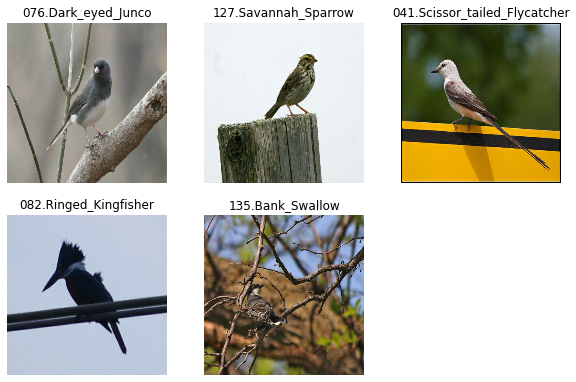

In [81]:
class_names = train_dataset.class_names
# print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(BATCH_SIZE):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [164]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [165]:
preprocess_input1 = keras.applications.efficientnet.preprocess_input
preprocess_input2 = keras.applications.vgg16.preprocess_input

In [166]:
# rescale = layers.Rescaling(1./127.5, offset=-1)

In [167]:
data_augmentation = keras.Sequential([
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.3),
  layers.Rescaling(1./255)
])
# image, label = next(iter(train_dataset))
# # plt.imshow(image[0])
# res = data_augmentation(image)
# plt.imshow(res[0])
# plt.axis("off")

In [168]:
# model1 = keras.Sequential()
# model2 = keras.Sequential()

In [169]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model1 = keras.applications.EfficientNetB0(input_shape=IMG_SHAPE,include_top=False,weights="imagenet",input_tensor=None,pooling='avg',classes=20,classifier_activation="softmax")
base_model2 = keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights="imagenet",input_tensor=None,pooling='avg',classes=20, classifier_activation="softmax")

In [170]:
base_model1.trainable = False
base_model2.trainable = False

In [171]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch1 = base_model1(image_batch)
feature_batch2 = base_model2(image_batch)

In [185]:
model1 = keras.Sequential([
                           data_augmentation,
                            
                          layers.Conv2D(16,3,padding='same',activation='relu'),
                           layers.MaxPooling2D(), 
                          layers.Conv2D(32,3,padding='same',activation='relu'),
                           layers.MaxPooling2D(),
                           layers.Dropout(0.2),
                           layers.Flatten(),
                           layers.Dense(512,activation = 'relu'),
                           layers.Dense(20,activation='softmax')
                          ])
# model1.add(layers.Flatten())
# model1.add(layers.Dense(512,activation = 'relu'))
# model1.add(layers.Dense(20,activation='softmax'))

In [ ]:
# model1.summary()

In [186]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [187]:
# warnings.filterwarnings(action='ignore')
epochs = 50
history = model1.fit(train_dataset,validation_data=val_dataset,epochs=epochs)

Epoch 1/50


164/164 [==============================] - 110s 653ms/step - loss: 3.0160 - accuracy: 0.0963 - val_loss: 2.8693 - val_accuracy: 0.1053
Epoch 2/50
164/164 [==============================] - 103s 631ms/step - loss: 2.8335 - accuracy: 0.1146 - val_loss: 2.7183 - val_accuracy: 0.1696
Epoch 3/50
164/164 [==============================] - 104s 633ms/step - loss: 2.7398 - accuracy: 0.1598 - val_loss: 2.6465 - val_accuracy: 0.1754
Epoch 4/50
164/164 [==============================] - 108s 658ms/step - loss: 2.5508 - accuracy: 0.2134 - val_loss: 2.4836 - val_accuracy: 0.1696
Epoch 5/50
164/164 [==============================] - 111s 674ms/step - loss: 2.4201 - accuracy: 0.2646 - val_loss: 2.4490 - val_accuracy: 0.2339
Epoch 6/50
164/164 [==============================] - 101s 613ms/step - loss: 2.2742 - accuracy: 0.2854 - val_loss: 2.4835 - val_accuracy: 0.2105
Epoch 7/50
164/164 [==============================] - 103s 627ms/step - loss: 2.1983 - accuracy: 0.3366 - val_loss: 2.4030 - val_accura

In [108]:
global_average_layer = layers.GlobalAveragePooling2D()
feature_batch_average1 = global_average_layer(feature_batch1)
feature_batch_average2 = global_average_layer(feature_batch2)
print(feature_batch_average1.shape)
print(feature_batch_average2.shape)


(5, 1280)
(5, 512)


In [124]:
prediction_layer1 = layers.Dense(20,activation = 'relu')
prediction_layer2 = layers.Dense(20,activation = 'relu')
prediction_batch1 = prediction_layer1(feature_batch_average1)
prediction_batch2 = prediction_layer2(feature_batch_average2)
print(prediction_batch1.shape)
print(prediction_batch2.shape)

(5, 20)
(5, 20)


In [125]:
inputs1 = keras.Input(shape=(160, 160, 3))
x1 = data_augmentation(inputs1)
x1 = preprocess_input1(x1)
x1 = base_model1(x1, training=False)
x1 = global_average_layer(x1)
x1 = tf.keras.layers.Dropout(0.2)(x1)
outputs1 = prediction_layer(x1)
model1 = tf.keras.Model(inputs1, outputs1)



In [126]:
inputs2 = keras.Input(shape=(160, 160, 3))
x2 = data_augmentation(inputs2)
x2 = preprocess_input2(x2)
x2 = base_model2(x2, training=False)
x2 = global_average_layer(x2)
x2 = tf.keras.layers.Dropout(0.2)(x2)
outputs2 = prediction_layer(x2)
model2 = tf.keras.Model(inputs2, outputs2)


ValueError: Exception encountered when calling layer "dense_5" (type Dense).

Dimensions must be equal, but are 512 and 1280 for '{{node dense_5/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_5/MatMul/ReadVariableOp)' with input shapes: [?,512], [1280,1].

Call arguments received by layer "dense_5" (type Dense):
  • inputs=tf.Tensor(shape=(None, 512), dtype=float32)

In [63]:
# source = r'../Data/processed_images/train/'
# destination = r'../Data/processed_images/flipped/'

# for folders, subfolders, filenames in os.walk(source):
#     for folder in folders:
#         for filename in filenames:
# #         print(folder+filename)
# #     print('.................')
#         path = os.path.join(source,filename)
#         src = cv2.imread(filename)
#         flipped = cv2.flip(src,0)
#         cv2.imwrite(os.path.join(destination,f"f_{filename}"),flipped)

In [ ]:
source = r'../Data/processed_images/train/'
destination = r'../Data/images/'
for folder in os.listdir(source):
#     folder_path = os.path.join(destination,folder)
#     os.mkdir(folder_path)
    path = os.path.join(source,folder)
    new_path = destination+folder+'/'
    for file in os.listdir(path):
        f_path = os.path.join(path,file)
#         print(f_path)
        src = cv2.imread(f_path)
        con_img = cv2.cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
        cv2.imwrite(new_path+f"c_{file}", con_img)